# About
Extreme Value Theory tells us that `max(n_pareto_samples)` follows a Fréchet distribution when the number of samples `n` is large.

In this notebook I plot the ratio of exact distribution vs. a Fréchet distribution fit. 

The resulting plot shows us a 1:1 ratio for large `n` indicating equivalence for practical purposes.

##### Permalink
[Click here](https://github.com/FergM/fattails/blob/main/notebooks/NB35%20-%20Distribution%20of%20the%20Sample%20Max.ipynb) for latest version of this notebook.

##### Context
SCFT Book:
* Chapter 9: Extreme Value Theory
* This is basically a replication of figure 9.2 from *Statistical Consequences of Fat Tails*.
* However here I plot the ratio of PDFs instead of the ratio of CDFs. Both ratios show a similar picture.

Wikipedia Links:
* [Generalised Extreme Value Distribution](https://en.wikipedia.org/wiki/Generalized_extreme_value_distribution)
* [Frechet Distribution](https://en.wikipedia.org/wiki/Fr%C3%A9chet_distribution)
* [Pareto Distribution](https://en.wikipedia.org/wiki/Pareto_distribution)

In [1]:
import numpy as np
import pandas as pd

### Functions

In [2]:
def pareto_max_pdf(x, n, alpha=2, L=1):
    """PDF of the maximum of n i.i.d. pareto observations.

    Calculates the probability density of observing x.
    Formula is broken into parts for readability.
    
    Parameters
    ----------
    x : float
        Value whose probability density we want to know
    n : int
        Number of observations. 
    L : float
        Minimum value possible
    alpha : float
        Pareto distribution Tail exponent
    
    
    Returns
    -------
    probability : float
        Probability density for observing x
        when other parameters are as specified.
    """
    
    left = alpha*n*(L/x)**alpha
 
    right = (1-(L/x)**alpha)**(n-1)
    
    probability = (left*right)/x
    
    return probability

In [3]:
def frechet_pdf(x, n, alpha=2, L=1):
    """Frechet PDF

    Calculates the probability density of observing x.
    Formula is broken into parts for readability.
    
    This is really a tailored frechet pdf adjusted
    in description to fit the problem at hand.
    
    Parameters
    ----------
    x : float
        Value whose probability density we want to know
    n : int
        Number of observations. 
    L : float
        Minimum value possible
    alpha : float
        Pareto distribution Tail exponent

    Returns
    -------
    probability : float
        Probability density for observing x
        when other parameters are as specified.
    """
    # See SCFT book for beta's definition
    beta = L*n**(1/alpha)

    left = alpha*beta**alpha
    mid = x**(-alpha-1)
    right = np.e**((beta**alpha)*(-x**-alpha))
    
    probability = left*mid*right

    return probability

In [4]:
def pdf_ratio(x, n, alpha=2, L=1):
    """Ratio of exact pareto pdf to frechet pdf."""
    ratio = pareto_max_pdf(x, n, alpha, L) / frechet_pdf(x, n, alpha, L)
    return ratio

### Check the Functions

In [5]:
# Set input values
x=5
n=100

alpha=2
L=1

In [6]:
frechet_pdf(x, n, alpha, L)

0.0293050222219747

In [7]:
pareto_max_pdf(x, n, alpha, L)

0.02811719893141599

In [8]:
pdf_ratio(x, n, alpha, L)

0.9594669036057578

# Create Data Table

In [9]:
# Create range of x values
x = range(1+1,50+1)  # x=1 is undefined so we start with x=2
df = pd.Series(x, name='x') \
       .to_frame() \
       .set_index('x')
df.tail(3)

""
x
48
49
50


In [10]:
# Add ratios for different sample sizes
sample_sizes = [100, 1_000]
for n in sample_sizes:
    df[f'ratio_n{n}'] = df.index.map( lambda x: pdf_ratio(x, n, alpha=2, L=1) )

Show tabular data:

In [11]:
# Each column is for a different sample size
df.head()

,ratio_n100,ratio_n1000
x,,
2,0.030791,5.752049e-17
3,0.577291,1.424205e-03
4,0.869955,1.389026e-01
5,0.959467,4.578688e-01
6,0.988923,6.942464e-01


In [12]:
df.tail()

,ratio_n100,ratio_n1000
x,,
46,1.000462,1.000361
47,1.000443,1.000350
48,1.000425,1.000340
49,1.000408,1.000330
50,1.000392,1.000320


# Plot Ratios
Plot the ratio of *exact PDF/frechet PDF* for a power law (tail_alpha=2, min=1).

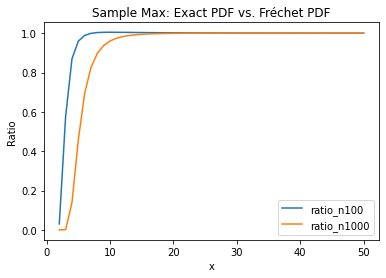

In [13]:
plot_kwargs = {'title':'Sample Max: Exact PDF vs. Fréchet PDF',
             'ylabel':'Ratio'}

df.plot(**plot_kwargs);